# Problem Statement

In recent years, news reports indicate that London is experiencing a surge in the number of knife-attacks. Here, let's take a data-centric approach to determine if this is true. Using the London Crime Statistics dataset provided by Google, we prove that violent crimes are indeed on the rise & London is currently-facing a "Knife pandemic".  

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [29]:
#Concatenate all 7 files into 1[9 years worth of data from 2008-2016]
m0 = pd.read_csv('london_crime0')
m1 = pd.read_csv('london_crime1')
m2 = pd.read_csv('london_crime2')
m3 = pd.read_csv('london_crime3')
m4 = pd.read_csv('london_crime4')
m5 = pd.read_csv('london_crime5')
m6 = pd.read_csv('london_crime6')

main = pd.concat([m0,m1,m2,m3,m4,m5,m6])
main.reset_index(drop=True,inplace=True)
len(main)

13490604

In [32]:
#Checking for null values
main.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [36]:
#Checking unique values for major_categories & borough
main['major_category'].unique(),main['borough'].unique()

(array(['Violence Against the Person', 'Theft and Handling', 'Drugs',
        'Other Notifiable Offences', 'Robbery', 'Criminal Damage',
        'Burglary', 'Sexual Offences', 'Fraud or Forgery'], dtype=object),
 array(['City of London', 'Brent', 'Barnet', 'Bexley', 'Camden', 'Ealing',
        'Harrow', 'Merton', 'Newham', 'Sutton', 'Bromley', 'Croydon',
        'Enfield', 'Hackney', 'Lambeth', 'Haringey', 'Havering',
        'Hounslow', 'Lewisham', 'Greenwich', 'Islington', 'Redbridge',
        'Southwark', 'Hillingdon', 'Wandsworth', 'Westminster',
        'Tower Hamlets', 'Waltham Forest', 'Barking and Dagenham',
        'Kingston upon Thames', 'Richmond upon Thames',
        'Hammersmith and Fulham', 'Kensington and Chelsea'], dtype=object))

# How many crimes are committed in London each year?

Let's plot a barchart to show the trend of crimes over the years.
The resulting plot shows an increase in crimes from 2014 to 2016 which follows a drop in preceeding years.
A line plot is also added to reflect trend of violent crimes over the years.
Most interesting is the surge in violent crimes from 2013 onwards.

In [286]:
df = pd.DataFrame({'count' : main.groupby(["year"])['value'].sum()}).reset_index()
df2 = pd.DataFrame({'count' : main.groupby(["year","major_category"])['value'].sum()}).reset_index()

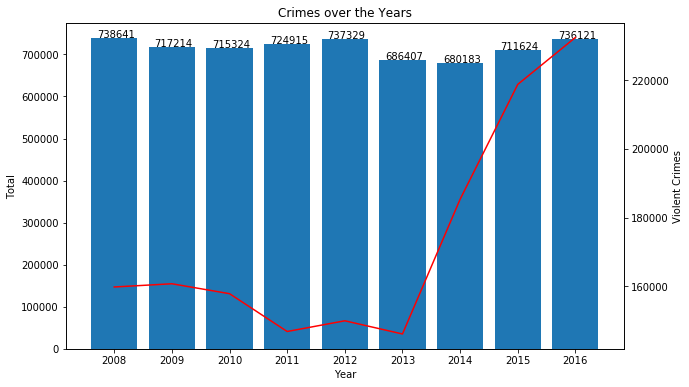

In [288]:
plt.figure(figsize=(10,6))
plt.bar('year','count',data=df,tick_label='year') 
plt.xlabel('Year')
plt.ylabel('Total')
for i, v in enumerate(df['count']):
    plt.text(df['year'][i] - 0.3, v+1000 , str(v))

df3 = df2[df2['major_category']=='Violence Against the Person']  
ax2 = plt.twinx()
ax2.plot('year', 'count', color='r',data=df3)
ax2.set_ylabel('Violent Crimes')  

plt.title('Crimes over the Years')
plt.show()

# Where are most crimes committed?

Let's examine the total crimes committed for each borough & arrange them in descending order in a dataframe.
The resulting dataframe shows Westminister having the most crimes committed.

In [294]:
pd.DataFrame({'count' : main.groupby(["borough"])['value'].sum()}).reset_index().sort_values(by=['count'],ascending=False)

,borough,count
32,Westminster,455028
21,Lambeth,292178
27,Southwark,278809
5,Camden,275147
24,Newham,262024
7,Croydon,260294
8,Ealing,251562
18,Islington,230286
29,Tower Hamlets,228613
3,Brent,227551


# What is the % change in crime across boroughs? (2011 to 2016)

Let's plot a horizontal bar chart to reflect % change in crime across boroughs.
Here, we take starting year as 2011 since City of London only has positive crime count starting from that year onwards.
In fact, City of London experienced an astounding 158% increase in crimes from 2011 to 2016. 

In [329]:
df = pd.DataFrame({'count' : main.groupby(["borough",'year'])['value'].sum()}).reset_index()
df1 = pd.DataFrame(columns=['borough','% change'])
for i in df['borough'].unique():
    change = round(((df[(df['borough']==i) & (df['year']==2016)]['count'].values[0] - df[(df['borough']==i) & (df['year']==2011)]['count'].values[0])/df[(df['borough']==i) & (df['year']==2011)]['count'].values[0]),3)*100
    df1 = df1.append({'borough':i,'% change':change}, ignore_index=True) 
df1.sort_values(by='% change',ascending=False,inplace=True)    

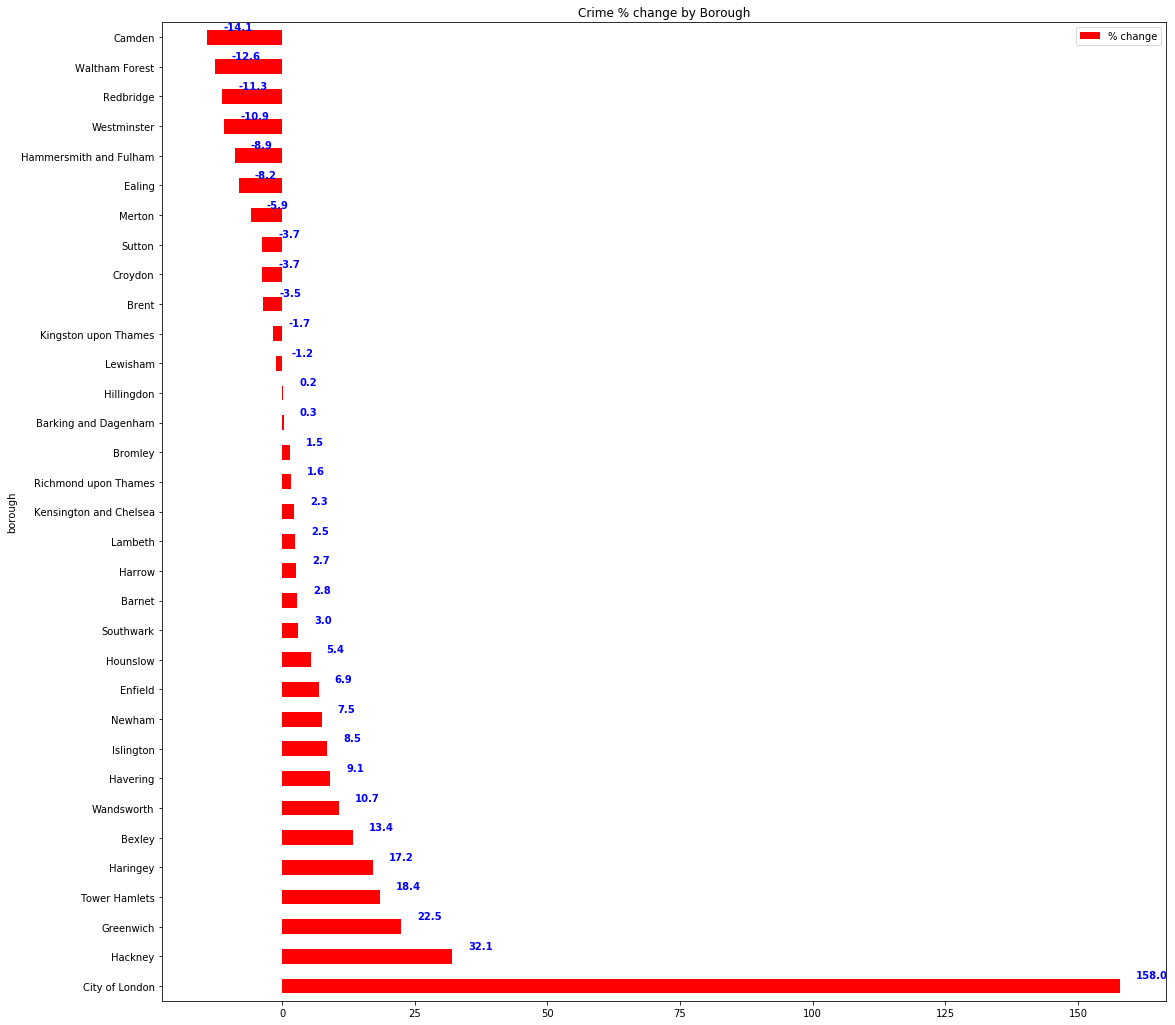

In [352]:
ax = df1.plot.barh(x='borough', y='% change', color='red', figsize=(18,18))
for i, v in enumerate(df1['% change']):
    ax.text(v + 3, i + .25, str(round(v,2)), color='blue', fontweight='bold') 
plt.title('Crime % change by Borough')    
plt.show()

# What types of crime are committed?

Let's examine proportion of each major category using a donut plot.
Note that each label is read as (major category type,total count)
The labels for each major category are as follows:
0-Burglary
1-Criminal Damage
2-Drugs
3-Fraud or Forgery
4-Other Notifiable Offences
5-Robbery
6-Sexual Offences
7-Theft and Handling
8-Violence Against the Person;
Theft,Violent Crimes & Burglary are the top 3 major crime categories.

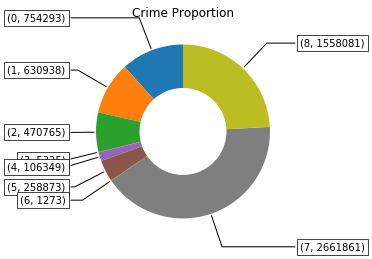

In [360]:
df = pd.DataFrame({'count' : main.groupby(['major_category'])['value'].sum()}).reset_index()
wedges, texts = plt.pie(df['count'], wedgeprops=dict(width=0.5), startangle=90)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    plt.annotate((df.index[i],df['count'].iloc[[i]].item()), xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

plt.title("Crime Proportion")
plt.show()

# Time Series

Let's do a lineplot to show the trend of violent crimes across months for each year.
The resulting plot shows such crimes peaking at around July for most years.
In fact, there's an article on this: https://www.bbc.com/news/uk-44821796.
Some scientists hypothesized that higher temperatures could have adverse effects on people's responses.

In [362]:
df = pd.DataFrame({'count' : main.groupby(["year",'month',"major_category"])['value'].sum()}).reset_index()

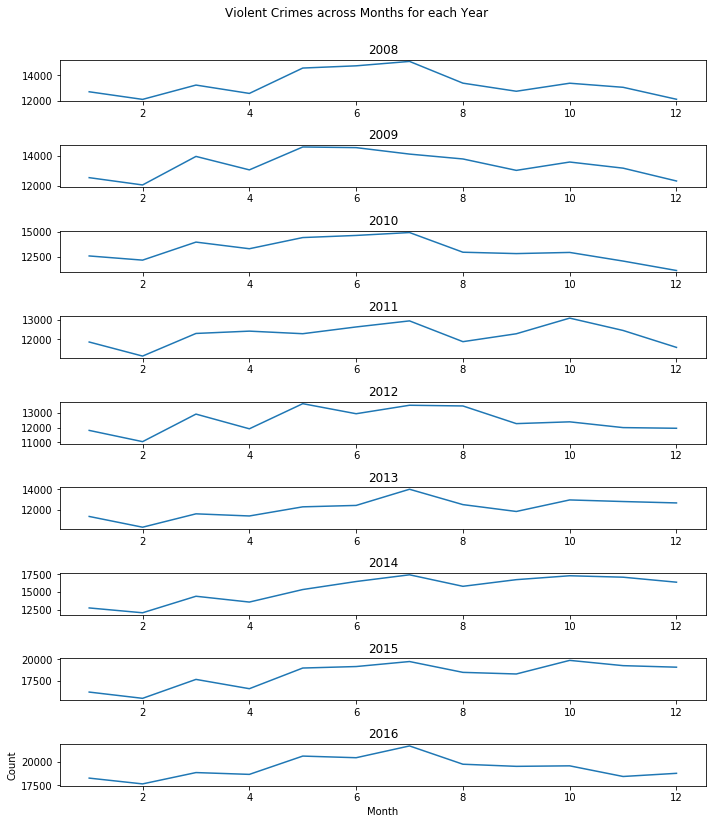

In [364]:
df1 = df[df['major_category']=='Violence Against the Person']
df1.reset_index(drop=True,inplace=True)
fig, axs = plt.subplots(9,figsize=(10,12))
fig.suptitle('Violent Crimes across Months for each Year')
j = 0 
for i in df1['year'].unique():
    new_df = df1[df1['year']==i]
    new_df.reset_index(drop=True,inplace=True)
    axs[j].set_title(str(i))
    axs[j].plot('month', 'count',data=new_df)
    j+=1
plt.xlabel('Month')
plt.ylabel('Count')    
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Time Series Decomposition

Since this is a time series, let's check for trend & seasonal patterns.
Resulting plot shows a clear increasing trend for total crimes from 2014 onwards.
Strong seasonal pattern that peaks at ends of 2nd & 3rd quarters each year.

In [379]:
df = pd.DataFrame({'count' : main.groupby(["year",'month'])['value'].sum()}).reset_index()
df['Date'] = df['month'].astype(str) + '-' +df['year'].astype(str)

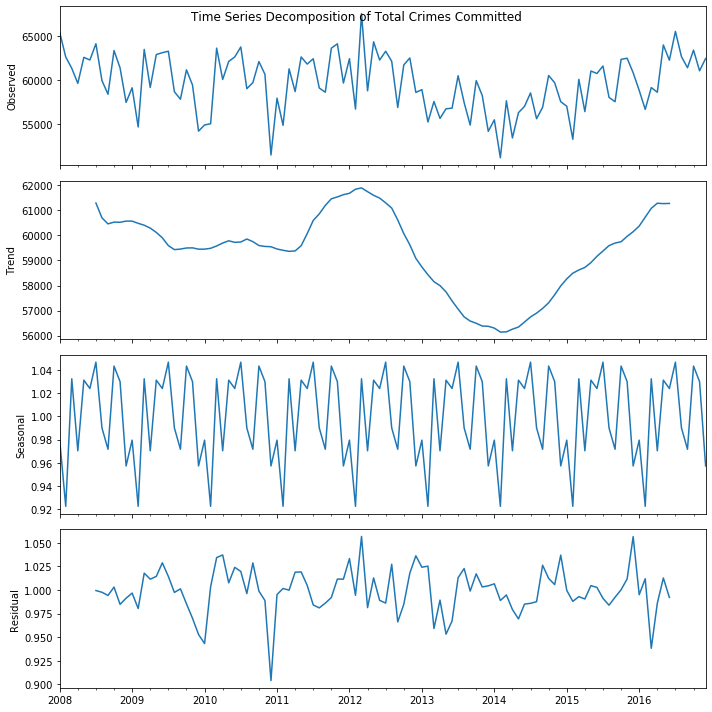

In [384]:
dates = pd.DatetimeIndex([parse(d).strftime('%m-%Y') for d in df['Date']])
df.set_index(dates, inplace=True)
result = seasonal_decompose(df['count'], model='multiplicative')


plt.rcParams.update({'figure.figsize': (10,10)})
result.plot().suptitle('Time Series Decomposition of Total Crimes Committed')
plt.show()

# What types of violent crimes are committed?

Let's use a treemap to examine the proportion of violent crimes committed.
The resulting plot shows that Harassment is most common, followed by assaults.
To make it clear, harassment involves acts such as stalking that puts the victim in fear of violence.

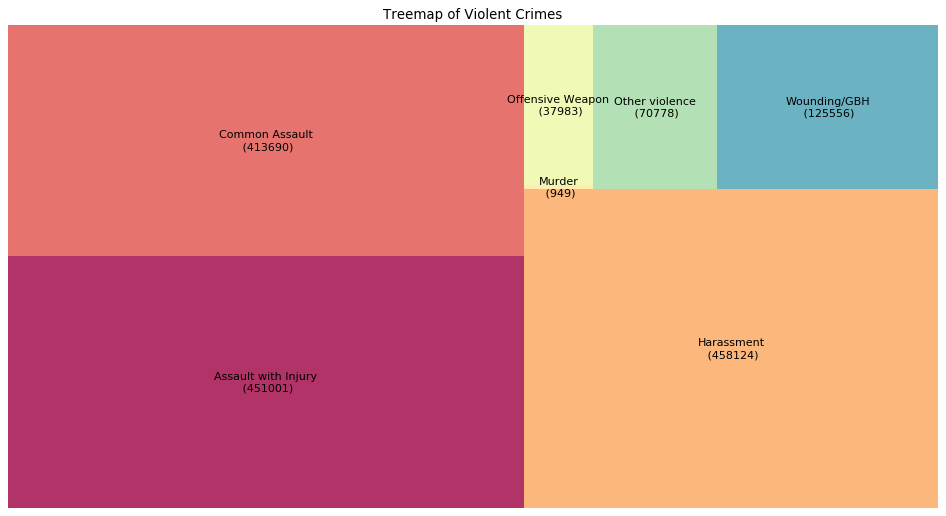

In [399]:
temp = main[main['major_category']=='Violence Against the Person']
df = temp.groupby('minor_category')['value'].sum().reset_index(name='count')

labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df['count'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

plt.figure(figsize=(15,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

plt.title('Treemap of Violent Crimes')
plt.axis('off')
plt.show()

# What types of minor-category crimes are committed?

Let's use a treemap to examine the proportion of minor_category crimes committed.
The resulting plot shows Theft,Burglary & Assault as the 3 major categories.

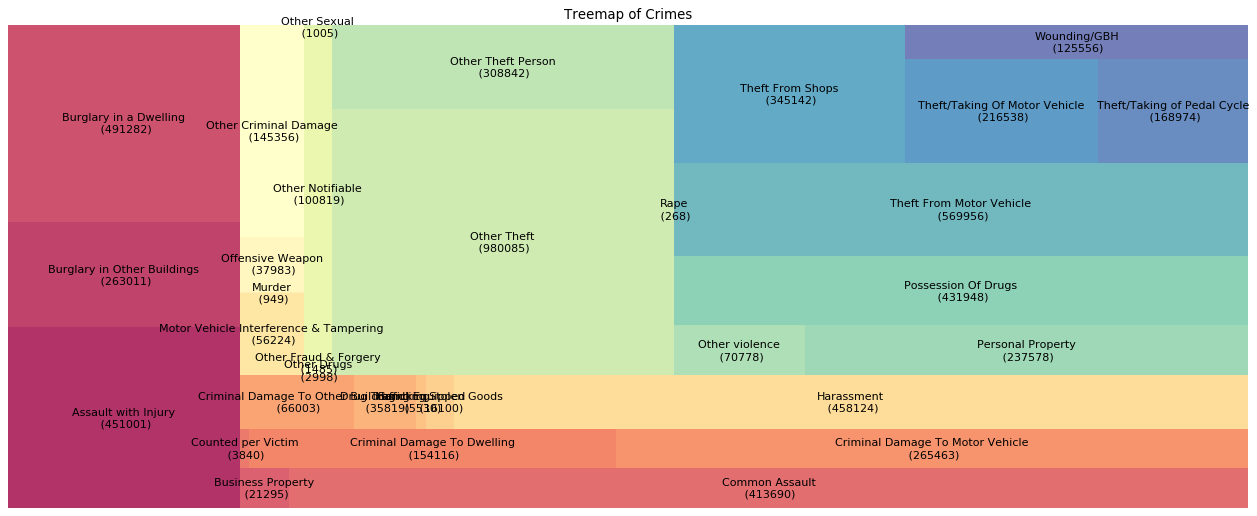

In [404]:
df = main.groupby('minor_category')['value'].sum().reset_index(name='count')

labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df['count'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

plt.figure(figsize=(20,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

plt.title('Treemap of Crimes')
plt.axis('off')
plt.show()

# Where are most violent crimes committed?

Resulting dataframe shows Lambeth having the most incidences of violent crimes.
In fact, googling the name  'Lambeth' gives the following description: 
"Lambeth has one of the highest crime rates among London boroughs, although not every neighbourhood is created equally – Southbank has problems with theft due to the high number of tourists, while certain areas of Brixton have struggled with violent crime and gun issues over the years."

In [401]:
df = main[main['major_category']=='Violence Against the Person']
df.groupby('borough')['value'].sum().reset_index(name='count').sort_values(by=['count'],ascending=False)

,borough,count
21,Lambeth,72726
32,Westminster,71448
8,Ealing,68492
27,Southwark,68356
7,Croydon,67791
24,Newham,66221
22,Lewisham,63652
3,Brent,63178
29,Tower Hamlets,59993
11,Hackney,56584


# Where are the most-dangerous boroughs?

We define most-dangerous by having the highest murders.
In fact, Newham has the highest occurences of murder at 56.

In [402]:
df = main[main['minor_category']=='Murder']
df.groupby('borough')['value'].sum().reset_index(name='count').sort_values(by=['count'],ascending=False)

,borough,count
23,Newham,56
20,Lambeth,53
26,Southwark,52
3,Brent,47
7,Ealing,46
17,Islington,45
6,Croydon,45
28,Tower Hamlets,45
12,Haringey,44
10,Hackney,44


# Conclusion

Are violent crimes increasing in London? Unfortunately, the answer is a resounding yes. In fact, incidences of violent crimes have grown by more than 5 times over the years. Although violent crimes are at all-time high, the total amount of crimes committed has yet to reach a new record(maximum crime count belongs to 2008). Perhaps one interesting point to note is the seasonality of total crimes committed, where the time series decompositions has shown crimes peaking at around the summer months. The alarming rise in violent crimes highlights the need for more policing-especially in areas such as City of London which has experienced a surge in crimes committed over the years.